In [5]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/srv/mfs/hausserlab/fabio/data_analysis/notebooks/karen_building_blocks_analysis'

In [11]:
import pandas as pd
from skimage import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from src.CellAbundance import CellAbundance, generate_abundance_matrix, join_abundance_matrices
from src.utils.visualization import plot_cells_positions, plot_cev_radius, plot_stacked_var_radius, radius_pc_all_variance, radius_pc_variance_contourf

In [8]:
N_SITE = 100
PATIENT_ID = 4
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Kreatin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
METHOD = 'abs'
PCA_SCALED = False
ROOT_DATA_PATH = "../../../output/cell_positions_data"
patient_ids = [1, 2, 3, 4, 5]
radius = np.linspace(np.log(5), np.log(390), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

In [64]:
abundances = {p: {r: CellAbundance(p, N_SITE, r, CELL_TYPES, method=METHOD, snr=1, root=ROOT_DATA_PATH) for r in radius} for p in patient_ids}
for p, v in abundances.items():
    for r, ca in v.items():
        ca.perform_PCA(scale=PCA_SCALED)

expr_var = {p: {r: np.cumsum(ca.pca.explained_variance_ratio_) for r, ca in v.items()} for p, v in abundances.items()}

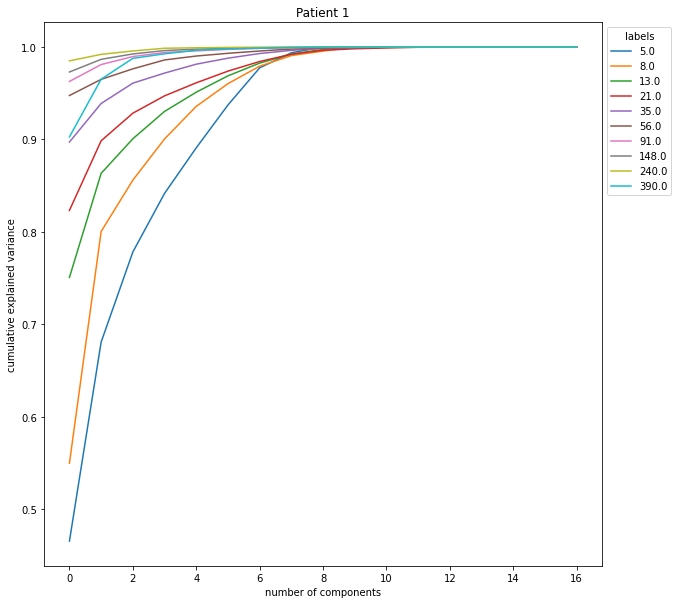

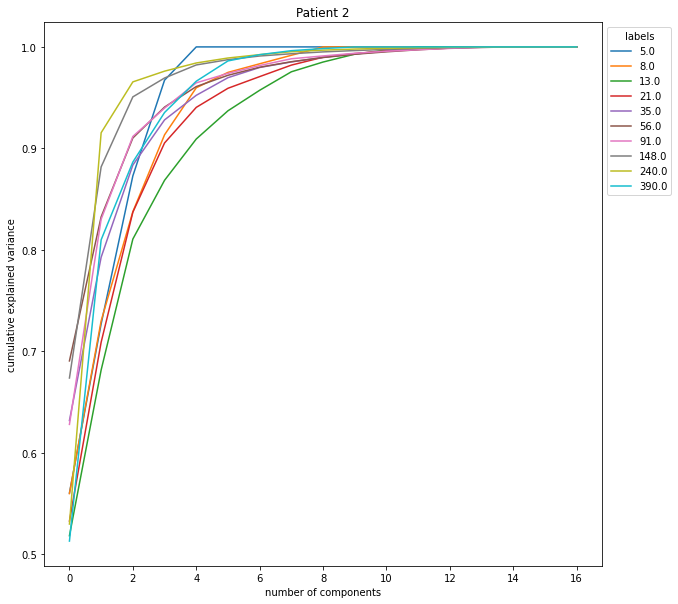

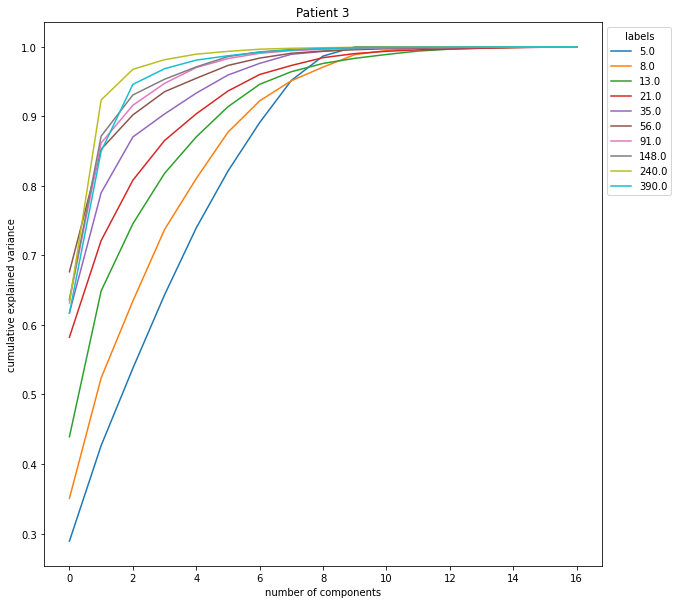

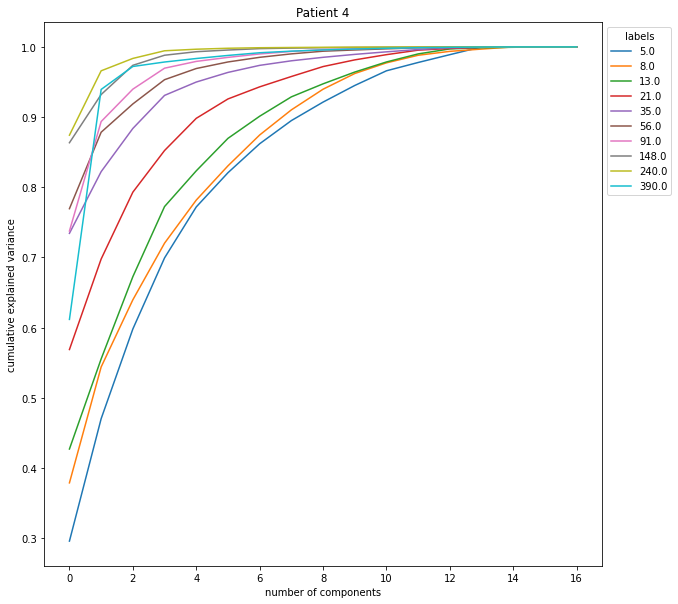

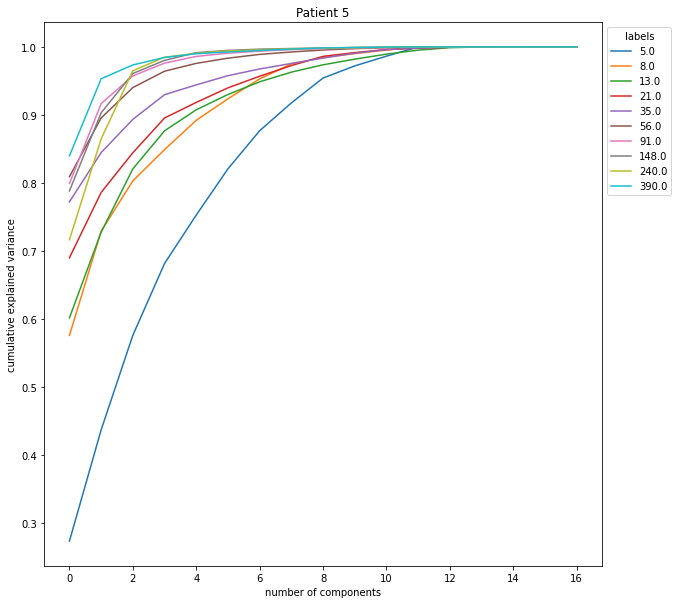

In [65]:
for p in patient_ids:
    plot_cev_radius(expr_var[p], p)

In [66]:
expl_var_ratio = {p: {r: ca.pca.explained_variance_ratio_ for r, ca in v.items()} for p, v in abundances.items()}

In [67]:
expl_var_ratio

{1: {5.0: array([4.65426393e-01, 2.15285032e-01, 9.74555617e-02, 6.33776340e-02,
         4.93113657e-02, 4.63282195e-02, 4.01759013e-02, 1.62704290e-02,
         6.36946467e-03, 1.24377223e-34, 1.25120826e-36, 2.73129228e-68,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]),
  8.0: array([5.49676397e-01, 2.50620281e-01, 5.55939363e-02, 4.45662467e-02,
         3.51954031e-02, 2.46347983e-02, 1.88512823e-02, 1.15182395e-02,
         4.76689647e-03, 4.57651926e-03, 1.30018576e-34, 3.22504668e-36,
         2.31381561e-38, 6.50364799e-71, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00]),
  13.0: array([7.50646626e-01, 1.12583721e-01, 3.73868550e-02, 2.96142868e-02,
         2.07980628e-02, 1.76666237e-02, 1.37810913e-02, 9.77237543e-03,
         5.04125842e-03, 1.54389852e-03, 6.60634219e-04, 5.04567098e-04,
         3.79920909e-35, 6.04138181e-36, 3.42690821e-68, 0.00000000e+00,
         0.00000000e+00]),
  21.0: array([8.2310899

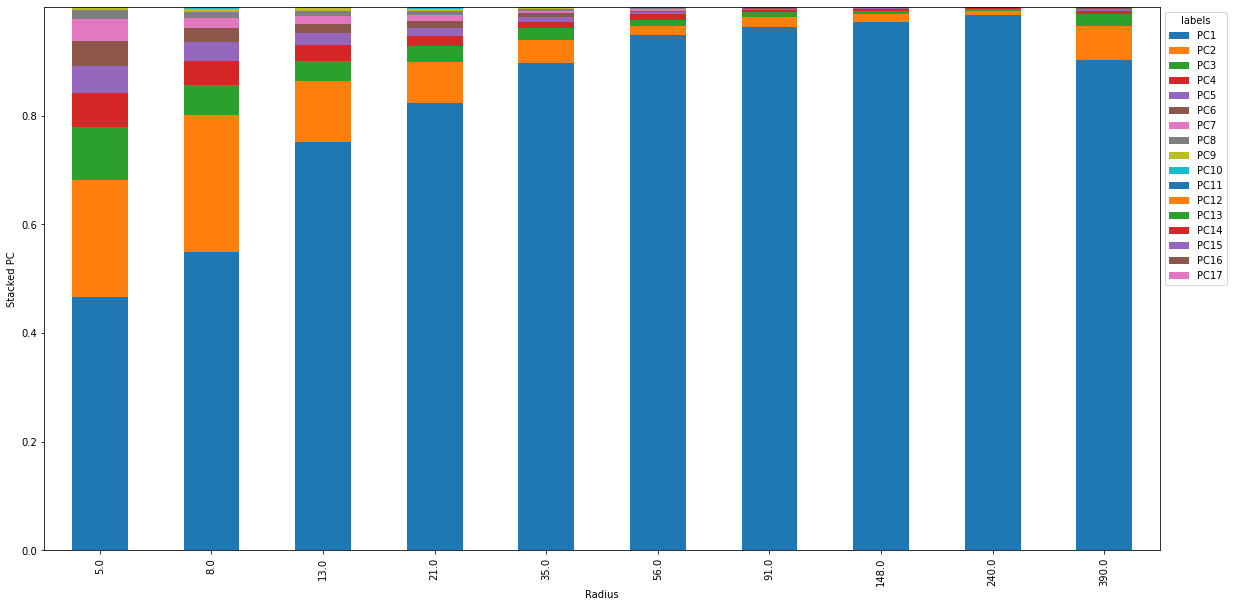

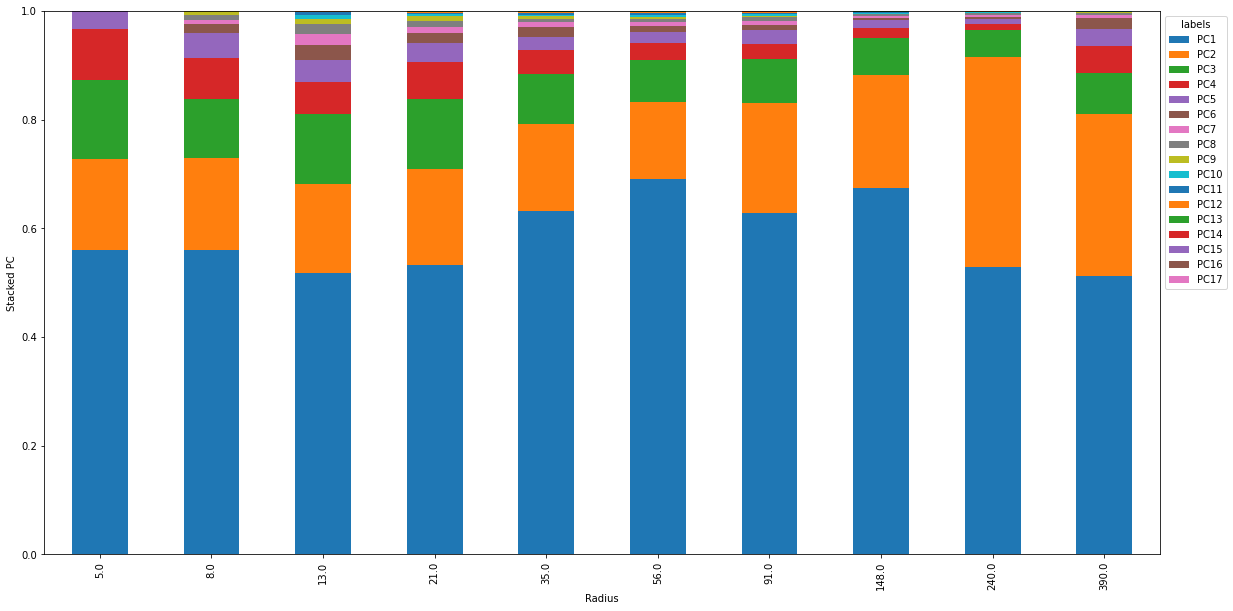

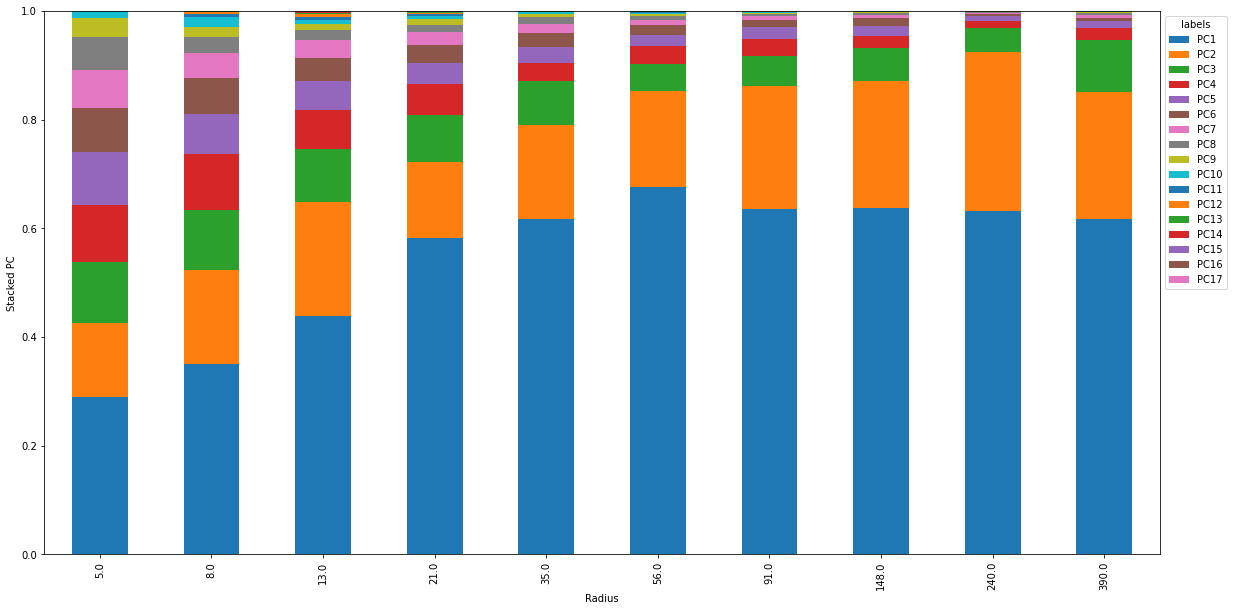

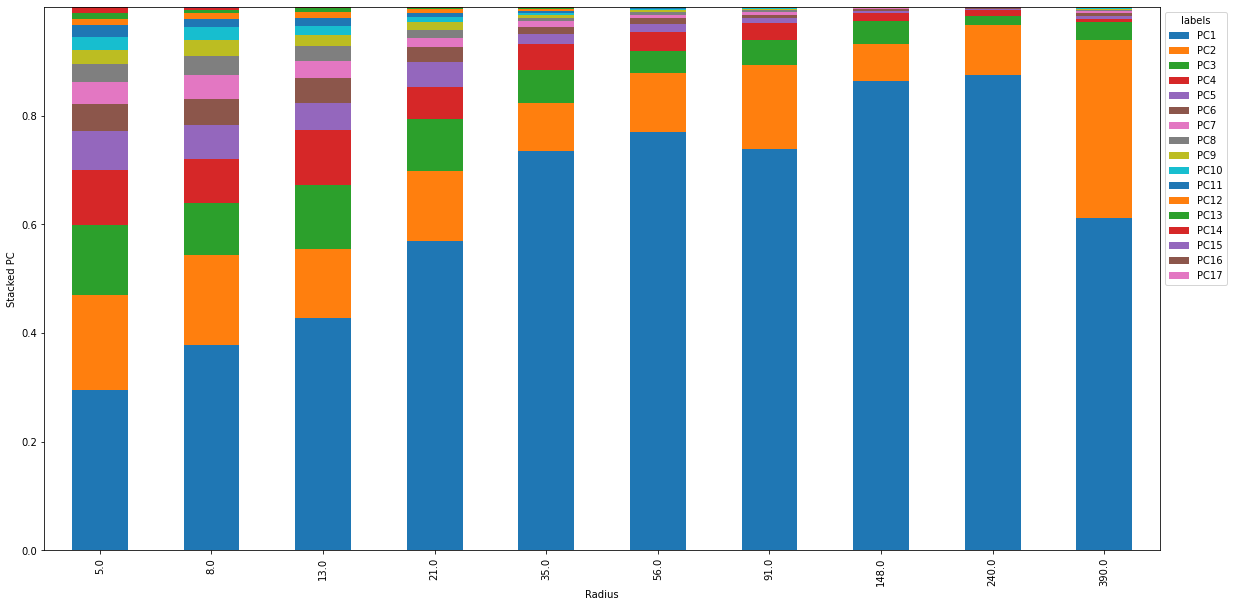

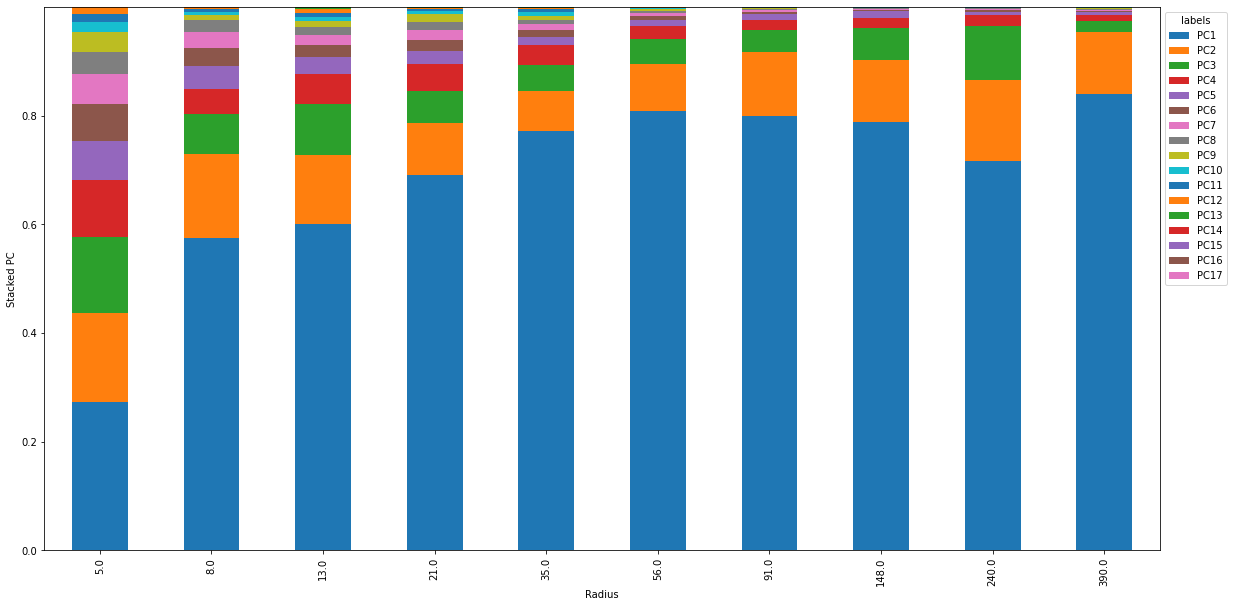

In [68]:
for p in patient_ids:
    plot_stacked_var_radius(expl_var_ratio[p])

In [69]:
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]

abundances = {p: {r: CellAbundance(p, N_SITE, r, CELL_TYPES, method=METHOD, snr=1, root=ROOT_DATA_PATH) for r in radius} for p in full_patient_ids}
for p, v in abundances.items():
    for r, ca in v.items():
        ca.perform_PCA(scale=PCA_SCALED)
expl_var_ratio = {p: {r: np.cumsum(ca.pca.explained_variance_ratio_) for r, ca in v.items()} for p, v in abundances.items()}


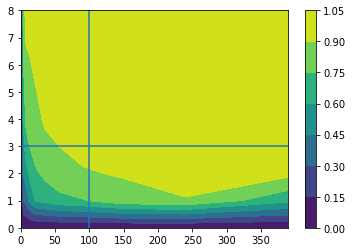

In [70]:
def get_explained_variance_matrix(X, Y, expl_var_ratio):
    z = np.empty((X.shape[0], Y.shape[1]))
    for i, x in enumerate(X.T):
        if x[0] != 0:
            z[:, i] = np.insert(expl_var_ratio[p][x[0]], 0, 0.0)
        else:
            z[:, i] = np.zeros(18)
    
    return z
    
p = 4
x = [0] + list(expl_var_ratio[p].keys())
y = np.arange(0, 18)
X, Y = np.meshgrid(x, y)
Z = get_explained_variance_matrix(X, Y, expl_var_ratio)
plt.contourf(X, Y, Z)
plt.axvline(x=100)
plt.axhline(y=3)
plt.ylim(0, 8)
plt.colorbar()
plt.show()

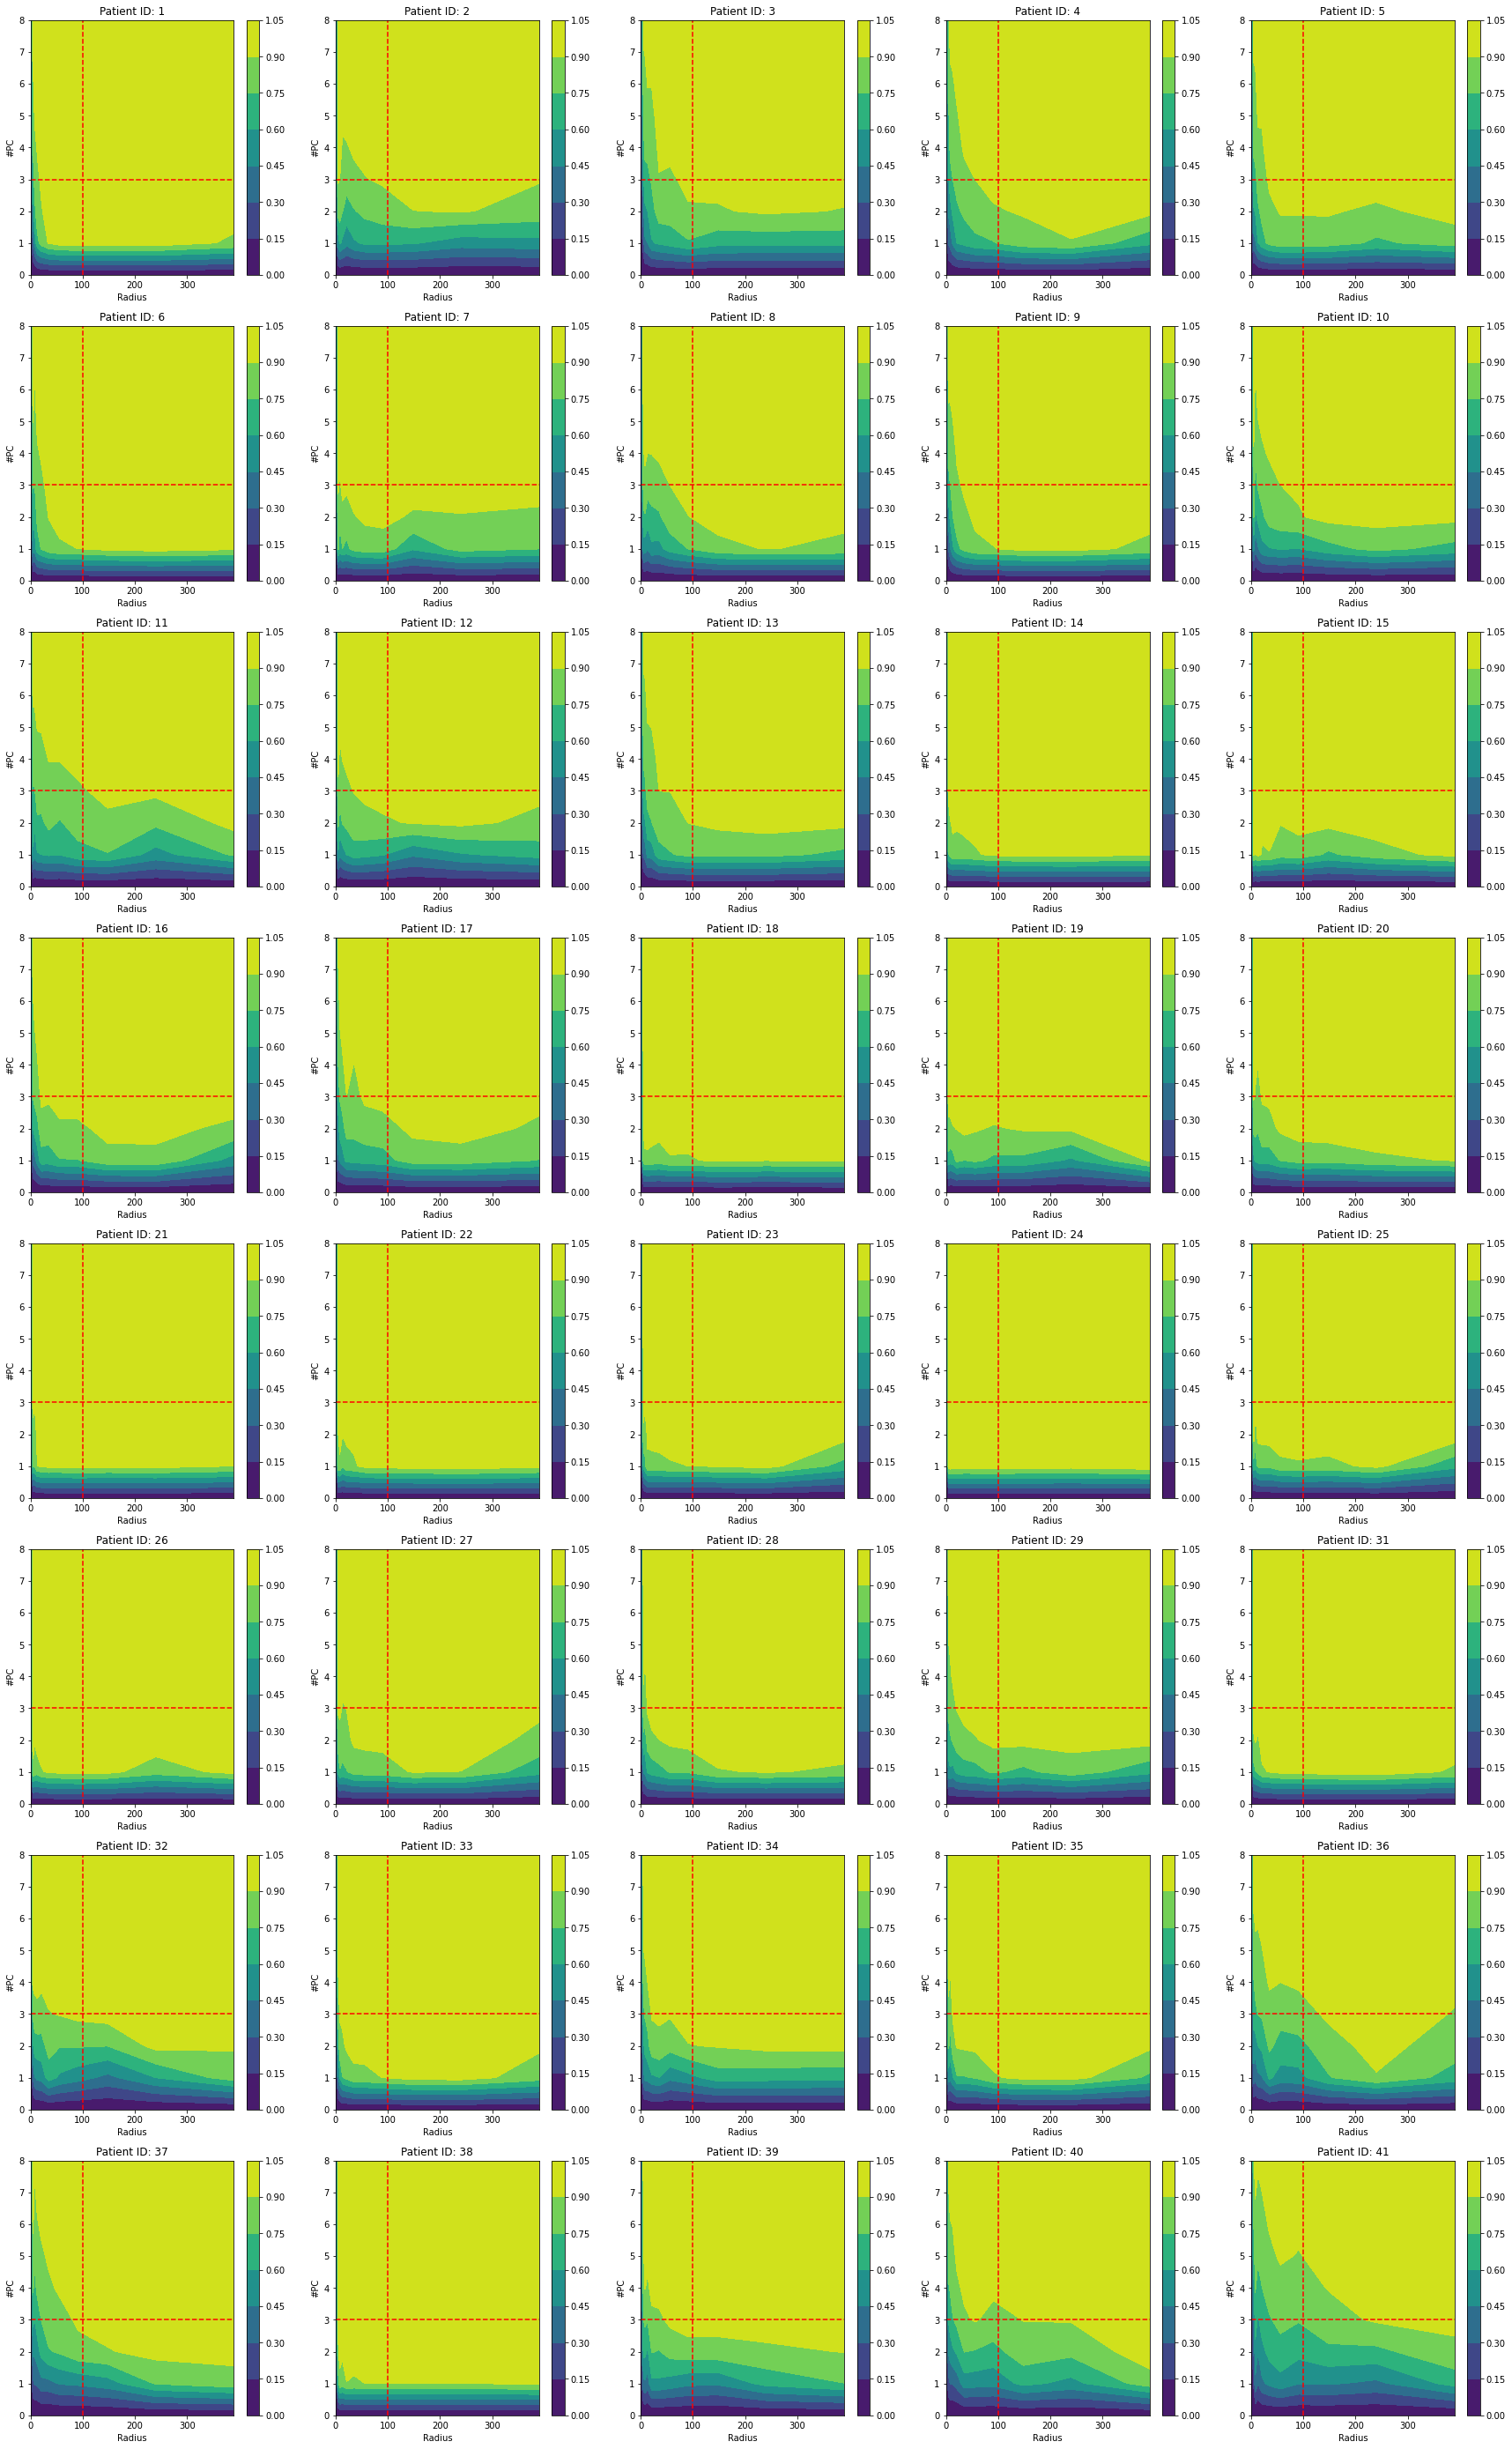

In [71]:
radius_pc_variance_contourf(full_patient_ids, expl_var_ratio)

In [10]:
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
ROOT_DATA_PATH = "../../../output/cell_positions_data"

expl_var_ratio = {}
for r in radius:
    abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method='abs', snr=3, root=ROOT_DATA_PATH)
    sites, patient_ids = join_abundance_matrices(abs_log_ca_list)
    pca = PCA()
    pc = pca.fit_transform(sites)
    expl_var_ratio[r] = np.cumsum(pca.explained_variance_ratio_)
expl_var_ratio

{5.0: array([0.45841005, 0.56029362, 0.6562212 , 0.72857682, 0.79409215,
        0.83607531, 0.87348207, 0.89844921, 0.9191255 , 0.93805617,
        0.95182136, 0.96372476, 0.97345711, 0.98242872, 0.98913127,
        0.99550653, 1.        ]),
 8.0: array([0.45805576, 0.55836531, 0.65385505, 0.73826673, 0.80895627,
        0.84911432, 0.88136983, 0.90347423, 0.92117665, 0.93820139,
        0.95493536, 0.96846611, 0.97597967, 0.98255426, 0.98904523,
        0.9952545 , 1.        ]),
 13.0: array([0.47967997, 0.60717084, 0.70726976, 0.78752478, 0.84823089,
        0.87858087, 0.90804522, 0.92486752, 0.94071112, 0.95578152,
        0.9655601 , 0.97502045, 0.98261285, 0.98911633, 0.9939984 ,
        0.99731814, 1.        ]),
 21.0: array([0.51617   , 0.65060946, 0.7589696 , 0.82893676, 0.88072376,
        0.90700185, 0.93008646, 0.94464108, 0.9586271 , 0.9703034 ,
        0.97673891, 0.98280245, 0.98849912, 0.9939801 , 0.9965631 ,
        0.99874214, 1.        ]),
 35.0: array([0.53002288, 

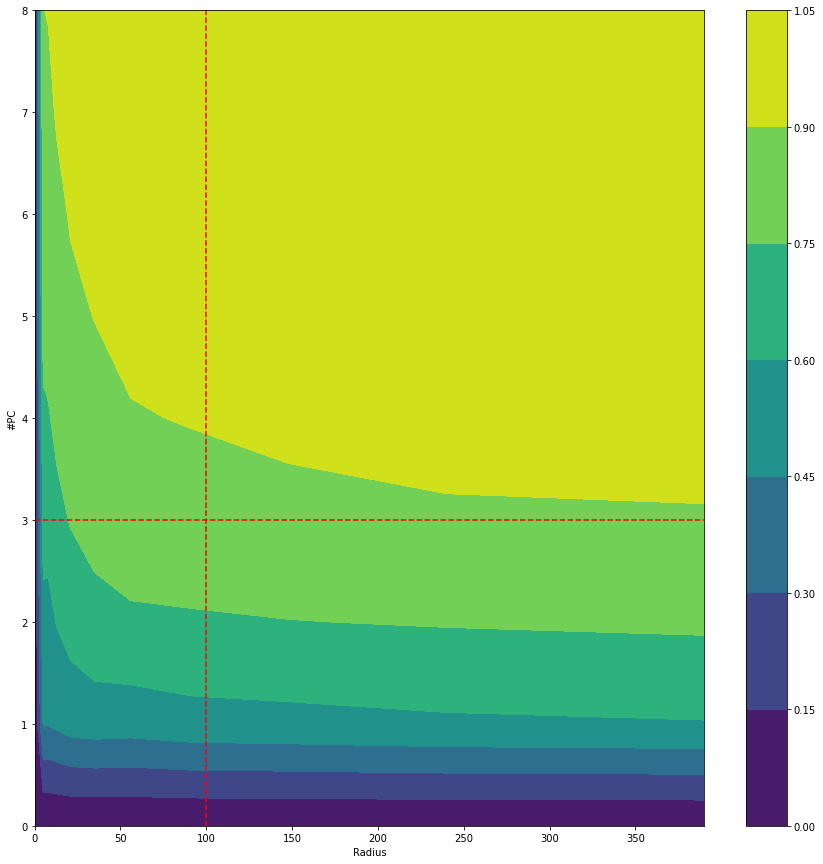

In [19]:
radius_pc_all_variance(expl_var_ratio)